### The following notebook accomplishes the following things:
1. Extracts the results from the observations file 
2. Creates the input file for initial conditions based on the spinup observations

- The following files are based on the scenario I as described in - D:\Seafile_folders\Seafile\My Library\Hannover_PhD\Work\ATS\RKModel\RKModel_info_simulation_strategy.xlsx\Spin_up_strategy

In [1]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec

### Observation data

In [2]:
df_obs_AWS = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [3]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    df_obs_AWS[f'point -{depth} temperature [K]'] = df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] + 273.15
    
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K]
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,...,-7.814958,-4.874889,-3.447965,260.642153,261.301181,261.854514,263.325278,265.335042,268.275111,269.702035
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,...,-7.936854,-5.063889,-3.639549,261.288403,261.807431,262.202292,263.368611,265.213146,268.086111,269.510451
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,...,-7.946111,-5.228028,-3.817500,261.325486,261.949306,262.384722,263.531597,265.203889,267.921972,269.332500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,...,-7.977951,-5.358771,-3.977958,261.152153,261.784514,262.282222,263.501111,265.172049,267.791229,269.172042
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,...,-8.078194,-5.476889,-4.119438,260.778403,261.458819,261.978819,263.320347,265.071806,267.673111,269.030562


In [4]:
####  Converting Soil moisture content to saturation of liquid

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3
poro_peat = 0.501199
poro_mineral = 0.407367

for i, depth in enumerate(depths):
    if depth < depth_peat:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Static spinup - I.C for all cases!

#### 1. Extracts the results from the observations file 

In [5]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_B_cv_spinup_I_final_HD1.demo/observations.dat', skiprows=178, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.04 saturation ice,point -0.1 saturation ice,point -0.2 saturation ice,point -0.4 saturation ice,point -0.8 saturation ice,point -1.2 saturation ice,point -1.6 saturation ice,point -5.0 saturation ice,point -10.0 saturation ice,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,...,0.523195,0.536892,0.552182,0.299482,0.571921,0.826493,0.826493,0.826493,0.826493,0.0
1.0,86400.0,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,...,0.523195,0.536892,0.552182,0.299482,0.571921,0.826493,0.826493,0.826493,0.826493,1.0
2.0,172800.0,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,...,0.523195,0.536892,0.552182,0.299482,0.571921,0.826493,0.826493,0.826493,0.826493,2.0
3.0,259200.0,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,...,0.523195,0.536892,0.552182,0.299482,0.571921,0.826493,0.826493,0.826493,0.826493,3.0
4.0,345600.0,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,268.45,...,0.523195,0.536892,0.552182,0.299482,0.571921,0.826493,0.826493,0.826493,0.826493,4.0


In [6]:
len(df_observation)

36526

In [7]:
### Extracting the final results from spinup (Check)

### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Case1_B_cv_spinup_I_final_HD1.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp = np.array(hdf.get('temperature.cell.0'))
    print(len(np.array(hdf.get('temperature.cell.0'))))
    #print(air_temp)

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))

List of datasets in this file: 
 
 ['advected_energy_flux.face.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'diffusive_energy_flux.face.0', 'dupwind_enthalpy_times_relative_permeability|dpressure.face.0', 'dupwind_enthalpy_times_relative_permeability|dtemperature.face.0', 'dupwind_relative_permeability|dpressure.face.0', 'dupwind_relative_permeability|dtemperature.face.0', 'dupwind_thermal_conductivity|dpressure.face.0', 'dwater_content|dtemperature.cell.0', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'pressure.cell.0', 'pressure.face.0', 'temperature.cell.0', 'temperature.face.0', 'upwind_enthalpy_times_relative_permeability.face.0', 'upwind_relative_permeability.face.0', 'upwind_thermal_conductivity.face.0']


400


#### Plotting the values 
##### 1. Subsurface temperature

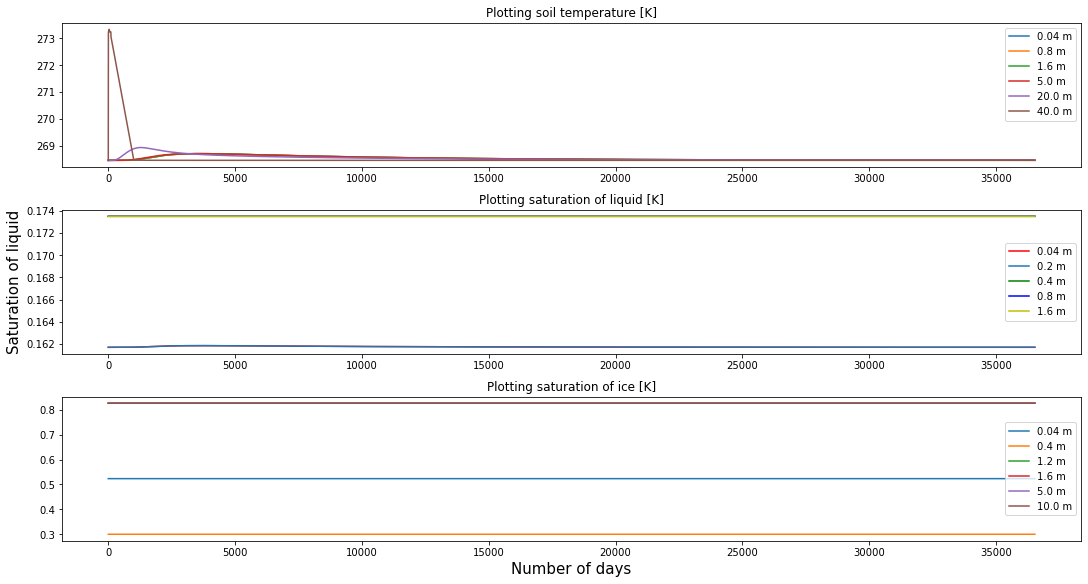

In [8]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
#f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
f2_ax2.plot(df_observation['point -0.4 saturation liquid'],'g',label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'],'r--',label='s - 0.04 m')
#f2_ax2.plot(df_obs_AWS['point -0.4 saturation liquid'],'g--',label='s - 0.4 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'],'b--',label='s - 0.8 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'],'y--',label='s - 1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('Saturation of liquid',fontsize=15)

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
#f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax3.legend()


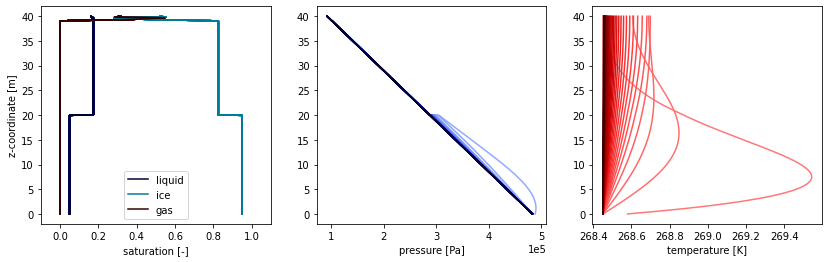

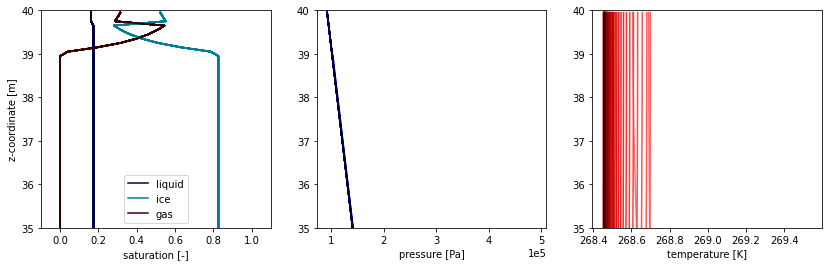

In [9]:
# plot the solution
directory = "Case1_B_cv_spinup_I_final_HD1.demo"

#
# plot the solution
#
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(directory, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(directory, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)
axs[0].set_ylim([35,40])
axs[1].set_ylim([35,40])
axs[2].set_ylim([35,40])


plt.show()

### Dynamic spinup (Scenario II) - Case 1 

In [10]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case1_B_cv_spinup_II_final_HD1.demo/observations.dat', skiprows=304, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,268.453858,268.453858,268.453858,268.453857,268.453856,268.453853,268.453850,268.453783,268.453552,...,0.258923,0.138283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,260.622575,263.457540,265.642131,267.034519,268.211973,268.424822,268.449519,268.453782,268.453551,...,0.258951,0.138291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,259.758905,262.173317,264.274900,265.842241,267.686627,268.281554,268.409741,268.453781,268.453551,...,0.258980,0.138310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,259.436834,261.532980,263.456210,264.996804,267.144782,268.066729,268.331114,268.453779,268.453550,...,0.259001,0.138332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,260.056561,261.627718,263.186741,264.528498,266.680570,267.818230,268.218776,268.453770,268.453550,...,0.259013,0.138352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [11]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

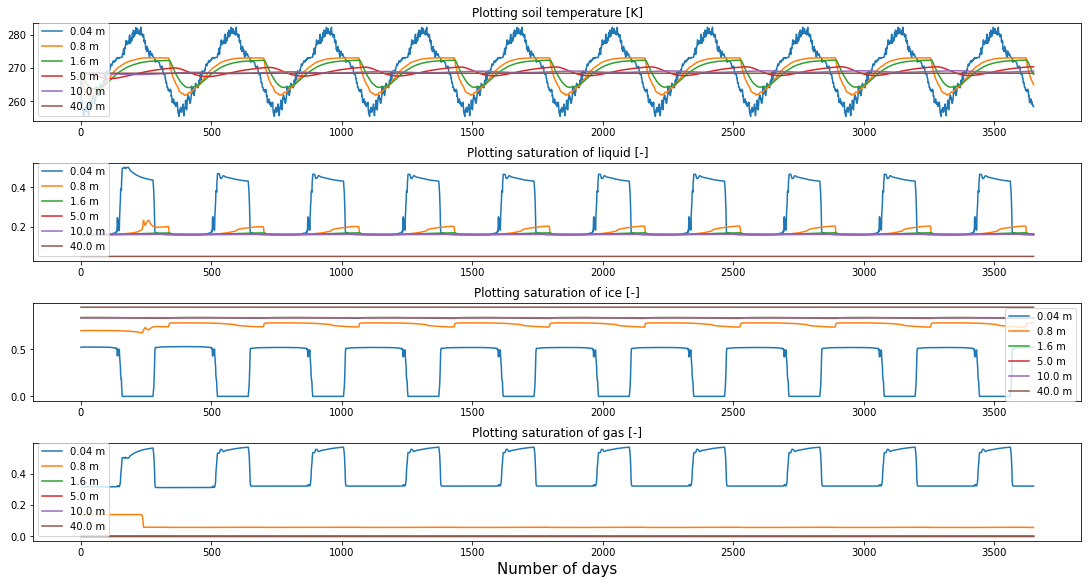

In [12]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

Comments: Observe that the saturation of gas reduces and saturation of ice increases at depth 0.8 m

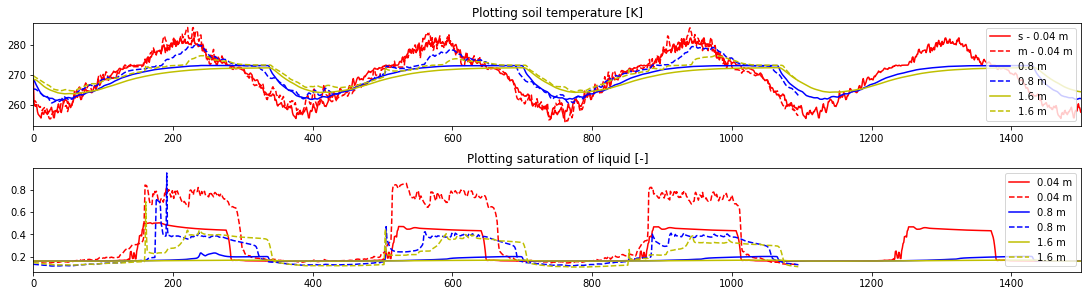

In [13]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

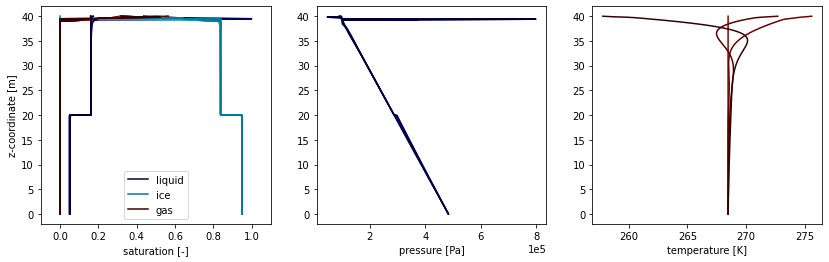

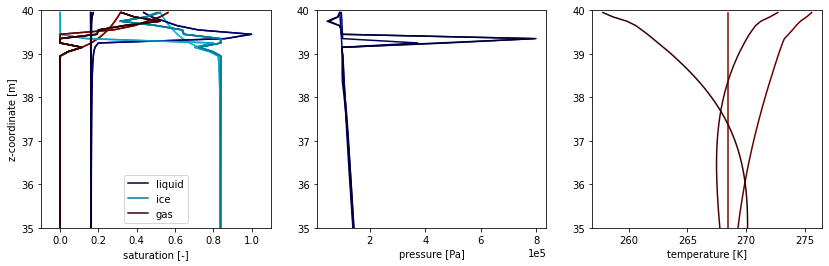

In [14]:
# plot the solution
directory = "Case1_B_cv_spinup_II_final_HD1.demo"

#
# plot the solution
#
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(directory, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(directory, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)
axs[0].set_ylim([35,40])
axs[1].set_ylim([35,40])
axs[2].set_ylim([35,40])


plt.show()

Clearly the temperature at the lower depths has been underestimated! - Due to initial conditions from spinup? Is there sufficient water in the column? Lower the initial temperature? 

##### How to determine the optimum time period for simulation? - Visually it seems to have reached a steady state! How can we quantitatively prove that?
- Find the difference between the simulated values of the present year with the next year.
- Plot these values and check when the values become constant!

In [15]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -5.0 temperature [K],point -10.0 temperature [K],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,9.329384,8.174379,6.694819,5.513646,3.499495,1.676391,0.428257,-1.561508,-0.074207,...,-0.009040,0.081216,-0.000053,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,1.133441,2.905982,3.753786,4.073357,3.361878,1.792576,0.568329,-1.553527,-0.078495,...,-0.009012,0.081221,-0.000062,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,0.677033,1.839091,2.497686,2.957925,2.937875,1.783012,0.666391,-1.544410,-0.082780,...,-0.008984,0.081238,-0.000071,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,0.488825,1.333432,1.794116,2.214428,2.502936,1.695153,0.719637,-1.534167,-0.087060,...,-0.008965,0.081258,-0.000079,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,0.368120,1.010053,1.355496,1.713484,2.117102,1.563466,0.732805,-1.522816,-0.091335,...,-0.008953,0.081275,-0.000087,0.0,0.0,0.0,0.0,0.0,0.0,-365.0


In [16]:
df_eqn_check = df_eqn_check.iloc[:3285]

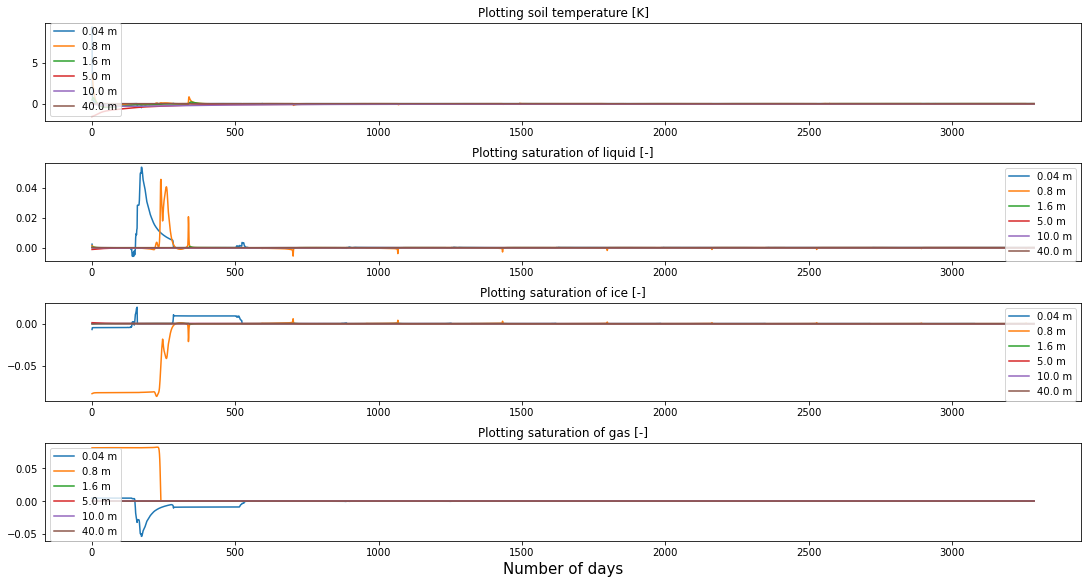

In [17]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

### Dynamic spinup (Scenario II) - Case 2

In [19]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_I_E_cv_spinup_III_HD1.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,725560.500121,0.0,0.0,3.901720e-08,0.0,0.0,0.0,0.0,0.0,...,0.258923,0.138283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,725493.734805,0.0,0.0,1.250354e-08,0.0,0.0,0.0,0.0,0.0,...,0.258942,0.138289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,725459.137629,0.0,0.0,7.232655e-09,0.0,0.0,0.0,0.0,0.0,...,0.258965,0.138303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,725426.631477,0.0,0.0,6.796559e-09,0.0,0.0,0.0,0.0,0.0,...,0.258983,0.138320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,725389.861723,0.0,0.0,7.684158e-09,0.0,0.0,0.0,0.0,0.0,...,0.258992,0.138335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


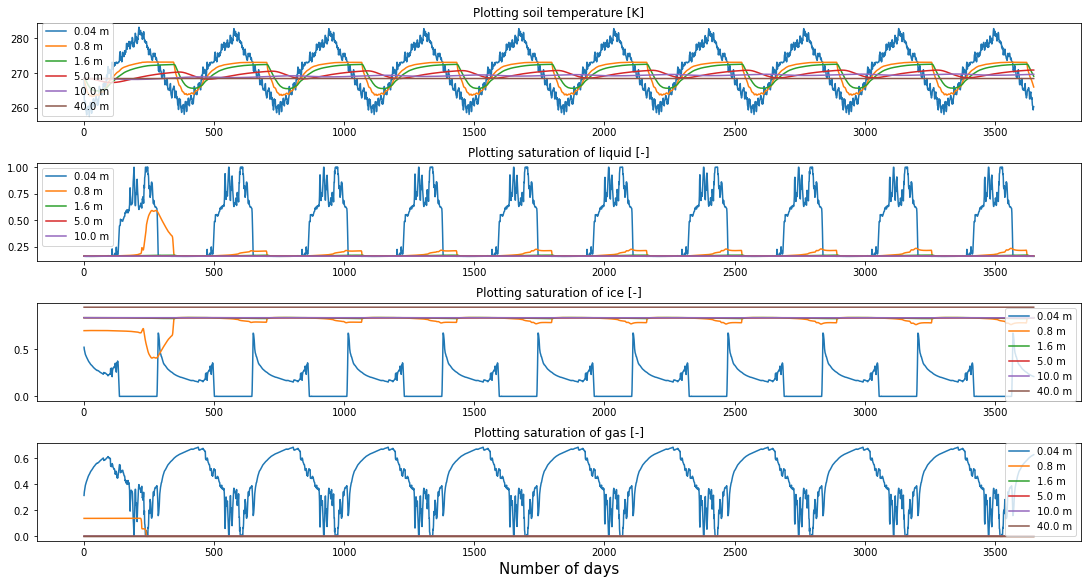

In [20]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

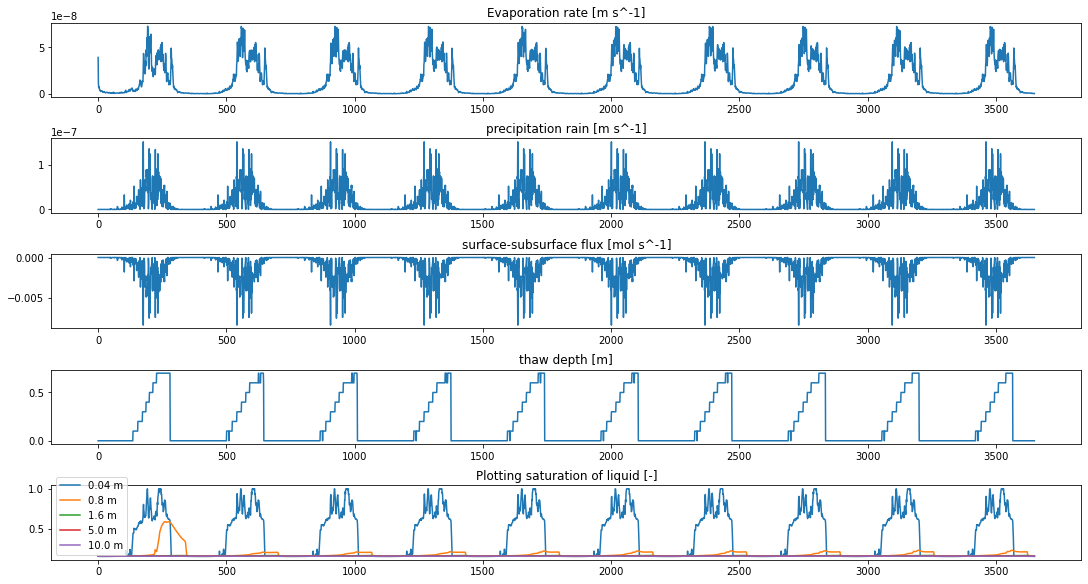

In [21]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax5.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax5.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()


In [22]:
len(df_observation)

3651

#### Plotting the values 
##### 1. Subsurface temperature

Comments: Observe that the saturation of gas reduces and saturation of ice increases at depth 0.8 m

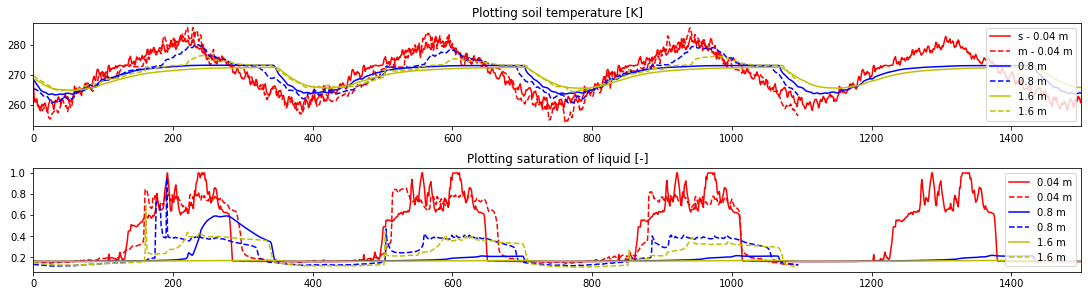

In [24]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

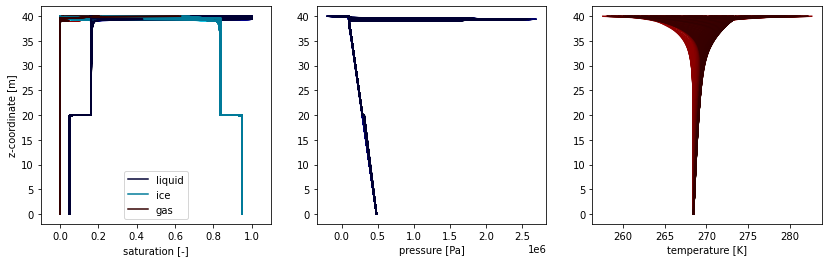

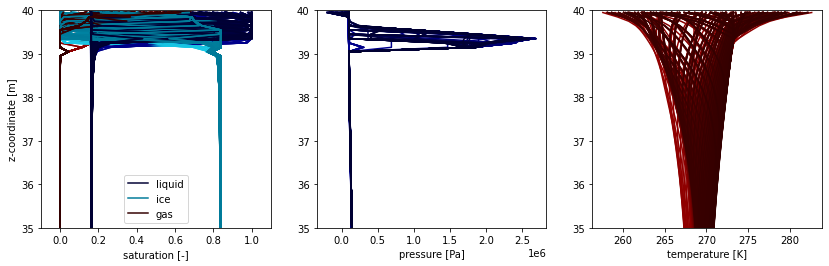

In [52]:
# plot the solution
directory = "Case5_I_E_cv_spinup_III_HD1.demo"

#
# plot the solution
#
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(directory, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(directory, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)
axs[0].set_ylim([35,40])
axs[1].set_ylim([35,40])
axs[2].set_ylim([35,40])


plt.show()

Clearly the temperature at the lower depths has been underestimated! - Due to initial conditions from spinup? Is there sufficient water in the column? Lower the initial temperature? 

##### How to determine the optimum time period for simulation? - Visually it seems to have reached a steady state! How can we quantitatively prove that?
- Find the difference between the simulated values of the present year with the next year.
- Plot these values and check when the values become constant!

In [53]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-2716.306364,0.0,0.0,3.821265e-08,0.0,0.0,0.0,0.0,0.0,...,0.209425,0.138283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-2779.390727,0.0,0.0,1.173448e-08,0.0,0.0,0.0,0.0,0.0,...,0.209449,0.138289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-2811.548200,0.0,0.0,6.722684e-09,0.0,0.0,0.0,0.0,0.0,...,0.209471,0.138303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-2841.474061,0.0,0.0,6.257121e-09,0.0,0.0,0.0,0.0,0.0,...,0.209486,0.138320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-2874.863990,0.0,0.0,6.977929e-09,0.0,0.0,0.0,0.0,0.0,...,0.209496,0.138335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.0


In [54]:
df_eqn_check = df_eqn_check.iloc[:3285]

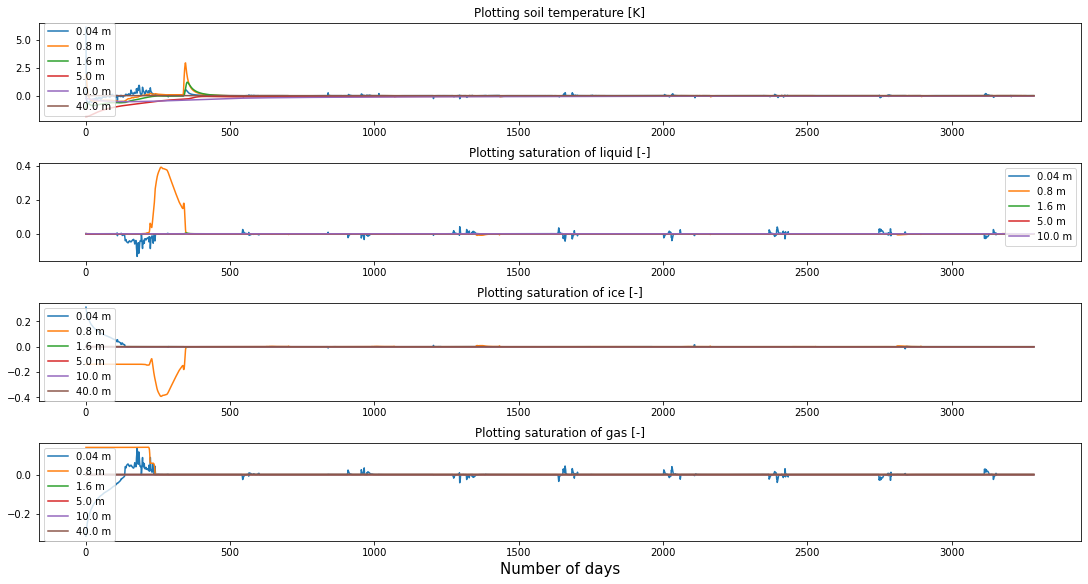

In [56]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

### Dynamic spinup (Scenario II) - Case 3

In [25]:
# Reading the csv file 
#/home/rk/ats_rk/testing/ats-demos/rk_model/Spinup_final_10032022/Case1_B_cv_spinup_II_final.demo
df_observation = pd.read_csv('Case5_III_C_cv_spinup_IV_HD1.demo/observations.dat', skiprows=346, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
0.0,0.0,725560.500121,0.0,0.000000,3.901720e-08,0.0,0.0,0.0,5.926505e-09,0.0,...,0.258923,0.138283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,86400.0,725496.548665,0.0,0.000101,1.251999e-08,0.0,0.0,0.0,9.645046e-11,0.0,...,0.258942,0.138289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2.0,172800.0,725462.810296,0.0,0.000092,7.222967e-09,0.0,0.0,0.0,5.787037e-11,0.0,...,0.258964,0.138303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3.0,259200.0,725430.888156,0.0,0.000089,6.921167e-09,0.0,0.0,0.0,2.121912e-10,0.0,...,0.258983,0.138320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4.0,345600.0,725394.447996,0.0,0.000073,7.906761e-09,0.0,0.0,0.0,1.157407e-10,0.0,...,0.258992,0.138335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [26]:
len(df_observation)

3651

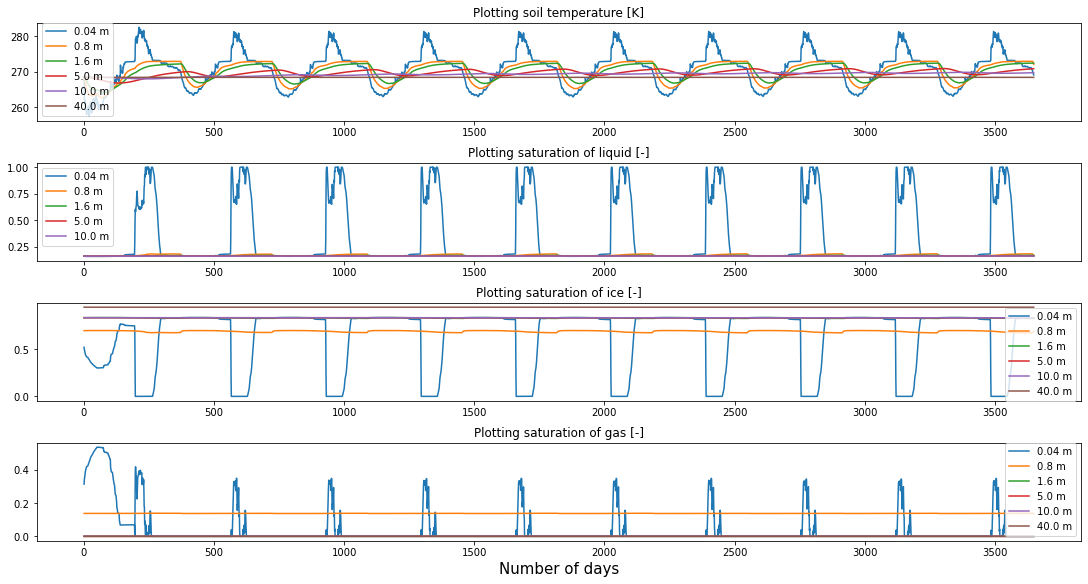

In [27]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_observation['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_observation['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_observation['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_observation['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_observation['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_observation['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_observation['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_observation['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_observation['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_observation['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_observation['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_observation['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()

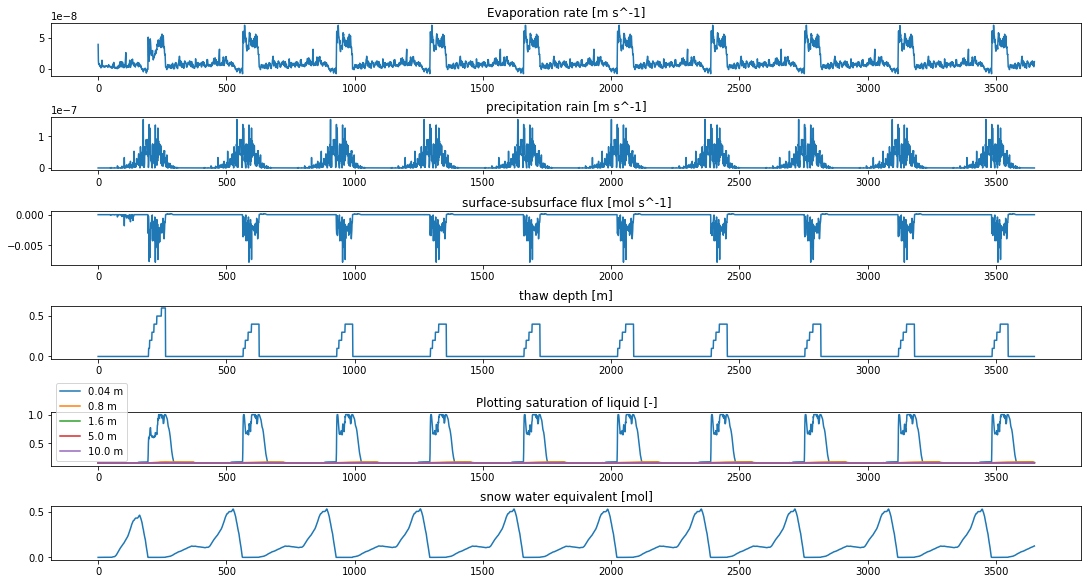

In [28]:
### Plotting the final results (mesured vs simulated) along with the parameters:
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

# Plotting Evaporation rate
f2_ax1.set_title('Evaporation rate [m s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['evaporation rate [m s^-1]'])

# Plotting precipitation rate
f2_ax2.set_title('precipitation rain [m s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['precipitation rain [m s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax3.set_title('surface-subsurface flux [mol s^-1]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_observation['surface-subsurface flux [mol s^-1]'])

# Plotting surface-subsurface flux [mol s^-1]
f2_ax4.set_title('thaw depth [m]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_observation['thaw depth [m]'])

# Plotting saturation of liquid
f2_ax5.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(df_observation['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax5.plot(df_observation['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax5.plot(df_observation['point -1.6 saturation liquid'],label='1.6 m')
f2_ax5.plot(df_observation['point -5.0 saturation liquid'],label='5.0 m')
f2_ax5.plot(df_observation['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax5.plot(df_observation['point -40.0 saturation liquid'],label='40.0 m')
f2_ax5.legend()

# Plotting surface-subsurface flux [mol s^-1]
#f2_ax6.set_title('precipitation snow [m s^-1]')

f2_ax6.set_title('snow water equivalent [mol]')

#f2_ax6.set_title('snow water equivalent [mol]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
#f2_ax6.plot(df_observation['precipitation snow [m s^-1]'])
f2_ax6.plot(df_observation['snow water equivalent [mol]'])


#### Plotting the values 
##### 1. Subsurface temperature

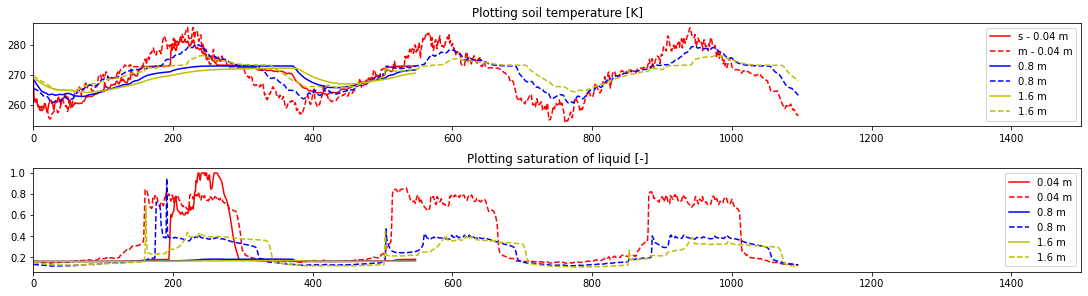

In [72]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

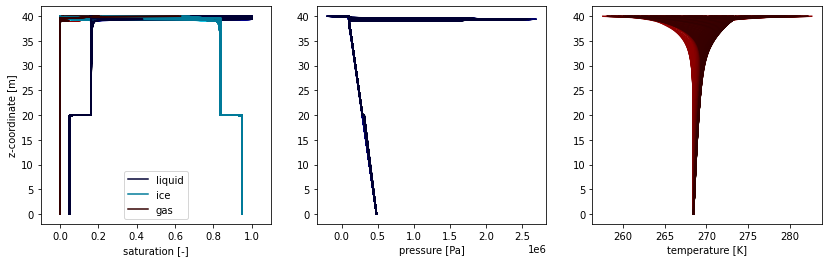

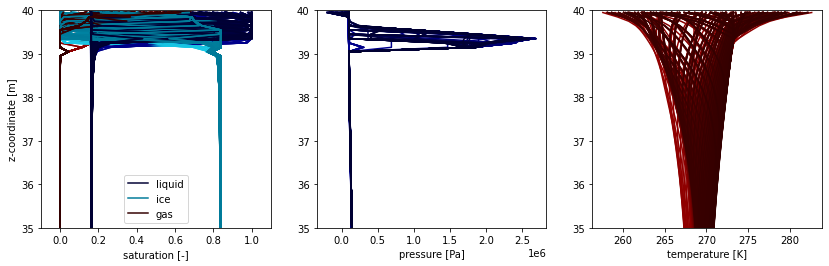

In [31]:
# plot the solution
directory = "Case5_I_E_cv_spinup_III_HD1.demo"

#
# plot the solution
#
def plot(dirname, axs):
    """A generic plotting function that plots saturation as a function of depth."""

    plot_column_data.plot_subsurface(vis, ['pressure',], axs[0], cmap='jet')
    axs[0].set_xlabel('pressure [Pa]')
    ax.set_ylabel('z [m]')
    
    plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[1], None, cmap='jet')
    axs[0].set_xlabel('saturation [-]')
    ax.set_ylabel('z [m]')

def plot(directory, axs, style):
    # load the data
    vis = ats_xdmf.VisFile(directory, time_unit='d')
    vis.loadMesh(columnar=True)
    dati = np.array([vis.getArray(v) for v in ["pressure", "pressure", "saturation_liquid", 
                                    "saturation_ice", "saturation_gas", "temperature"]])
    times = vis.times
    
    ice = colors.cm_mapper(-10000, times[-1], colors.ice_cmap())
    water = colors.cm_mapper(-10000, times[-1], colors.water_cmap())
    gas = colors.cm_mapper(-10000, times[-1], colors.gas_cmap())    
    
    # plot saturation of liquid, pressure
    z = vis.centroids[:,2]
    for i,t in enumerate(times):
        label = False
        if i == len(times)-1:
            axs[0].plot(dati[2,i,:],z, style, color=water(t), label='liquid')
            axs[0].plot(dati[3,i,:],z, style, color=ice(t), label='ice')
            axs[0].plot(dati[4,i,:],z, style, color=gas(t), label='gas')
        else:
            axs[0].plot(dati[2,i,:],z, style, color=water(t))
            axs[0].plot(dati[3,i,:],z, style, color=ice(t))
            axs[0].plot(dati[4,i,:],z, style, color=gas(t))
        axs[2].plot(dati[5,i,:],z, style, color=gas(t))
        axs[1].plot(dati[1,i,:],z, style, color=water(t))
        axs[0].plot(dati[2,i,:],z, style, color=water(t))
        axs[0].plot(dati[3,i,:],z, style, color=ice(t))
        axs[0].plot(dati[4,i,:],z, style, color=gas(t))

def decorate(axs):
    axs[0].set_xlabel('saturation [-]')
    axs[0].set_ylabel('z-coordinate [m]')
    axs[1].set_xlabel('pressure [Pa]')
    axs[2].set_xlabel('temperature [K]')
    axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    axs[0].set_xlim([-.1,1.1])
    axs[0].legend()


# full column
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)

# and a zoomed version
fig, axs = plt.subplots(1,3, figsize=(14,4))
plot(directory, axs, '-')
decorate(axs)
axs[0].set_ylim([35,40])
axs[1].set_ylim([35,40])
axs[2].set_ylim([35,40])


plt.show()

Clearly the temperature at the lower depths has been underestimated! - Due to initial conditions from spinup? Is there sufficient water in the column? Lower the initial temperature? 

##### How to determine the optimum time period for simulation? - Visually it seems to have reached a steady state! How can we quantitatively prove that?
- Find the difference between the simulated values of the present year with the next year.
- Plot these values and check when the values become constant!

In [32]:
df_eqn_check = df_observation.iloc[1:,:].copy()

no_itr = 9

all_columns = df_eqn_check.columns

#for i, cols in enumerate(all_columns):
for i in np.arange(0,9,1):
    for j in np.arange(365):
        df_eqn_check.iloc[j+i*365,:] = df_observation.iloc[j+i*365,:] - df_observation.iloc[j+i*365+365,:]
        #print(j+i*365)
    #df_eqn_check.iloc[]
    #print(cols)
df_eqn_check.head()   

,time [s],water content [mol],surface water content [mol],snow water equivalent [mol],evaporation rate [m s^-1],discharge [mol s^-1],surface-subsurface flux [mol s^-1],precipitation rain [m s^-1],precipitation snow [m s^-1],snow melt [m s^-1],...,point -0.4 saturation gas,point -0.8 saturation gas,point -1.2 saturation gas,point -1.6 saturation gas,point -5.0 saturation gas,point -10.0 saturation gas,point -20.0 saturation gas,point -30.0 saturation gas,point -40.0 saturation gas,time [days]
time [days],,,,,,,,,,,,,,,,,,,,,
1.0,-31536000.0,-5113.299185,-1072.551852,-0.123206,2.803945e-08,0.0,-1.046091e-11,0.0,0.0,0.0,...,0.258923,-0.001063,-0.000340,-0.000019,0.0,0.0,0.0,0.0,0.0,-365.0
2.0,-31536000.0,-5177.250641,-1072.551853,-0.122524,5.703477e-09,0.0,-1.070878e-11,0.0,0.0,0.0,...,0.258942,-0.001057,-0.000341,-0.000020,0.0,0.0,0.0,0.0,0.0,-365.0
3.0,-31536000.0,-5210.989009,-1072.551854,-0.122300,4.468616e-09,0.0,-9.746870e-12,0.0,0.0,0.0,...,0.258964,-0.001041,-0.000342,-0.000021,0.0,0.0,0.0,0.0,0.0,-365.0
4.0,-31536000.0,-5242.911148,-1072.551855,-0.121924,2.322141e-09,0.0,-9.010894e-12,0.0,0.0,0.0,...,0.258983,-0.001022,-0.000343,-0.000022,0.0,0.0,0.0,0.0,0.0,-365.0
5.0,-31536000.0,-5279.351307,-1072.551855,-0.121323,6.563752e-10,0.0,-9.194888e-12,0.0,0.0,0.0,...,0.258992,-0.001001,-0.000344,-0.000023,0.0,0.0,0.0,0.0,0.0,-365.0


In [33]:
df_eqn_check = df_eqn_check.iloc[:3285]

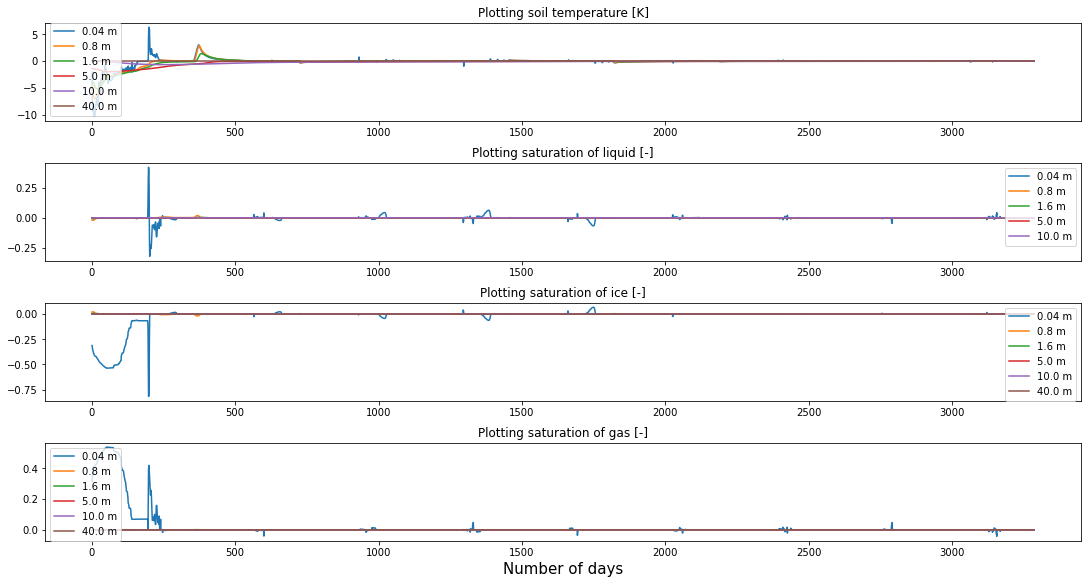

In [34]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])

# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_eqn_check['point -0.04 temperature [K]'],label='0.04 m')
#f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r--',label='0.04 m')
#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_eqn_check['point -0.8 temperature [K]'],label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_eqn_check['point -1.6 temperature [K]'],label='1.6 m')
f2_ax1.plot(df_eqn_check['point -5.0 temperature [K]'],label='5.0 m')
f2_ax1.plot(df_eqn_check['point -10.0 temperature [K]'],label='10.0 m')
#f2_ax1.plot(df_observation['point -20.0 temperature [K]'],label='20.0 m')
f2_ax1.plot(df_eqn_check['point -40.0 temperature [K]'],label='40.0 m')
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_eqn_check['point -0.04 saturation liquid'],label='0.04 m')
#f2_ax2.plot(df_observation['point -0.2 saturation liquid'],label='0.2 m')
#f2_ax2.plot(df_observation['point -0.4 saturation liquid'],label='0.4 m')
f2_ax2.plot(df_eqn_check['point -0.8 saturation liquid'],label='0.8 m')
#f2_ax2.plot(df_observation['point -1.2 saturation liquid'],label='1.2 m')
f2_ax2.plot(df_eqn_check['point -1.6 saturation liquid'],label='1.6 m')
f2_ax2.plot(df_eqn_check['point -5.0 saturation liquid'],label='5.0 m')
f2_ax2.plot(df_eqn_check['point -10.0 saturation liquid'],label='10.0 m')
#f2_ax2.plot(df_eqn_check['point -40.0 saturation liquid'],label='40.0 m')
f2_ax2.legend()

# Plotting saturation of ice
f2_ax3.set_title('Plotting saturation of ice [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_eqn_check['point -0.04 saturation ice'],label='0.04 m')
#f2_ax3.plot(df_observation['point -0.2 saturation ice'],label='0.2 m')
#f2_ax3.plot(df_observation['point -0.4 saturation ice'],label='0.4 m')
f2_ax3.plot(df_eqn_check['point -0.8 saturation ice'],label='0.8 m')
#f2_ax3.plot(df_observation['point -1.2 saturation ice'],label='1.2 m')
f2_ax3.plot(df_eqn_check['point -1.6 saturation ice'],label='1.6 m')
f2_ax3.plot(df_eqn_check['point -5.0 saturation ice'],label='5.0 m')
f2_ax3.plot(df_eqn_check['point -10.0 saturation ice'],label='10.0 m')
#f2_ax3.plot(df_observation['point -20.0 saturation ice'],label='20.0 m')
f2_ax3.plot(df_eqn_check['point -40.0 saturation ice'],label='40.0 m')
f2_ax3.legend()

# Plotting saturation of gas
f2_ax4.set_title('Plotting saturation of gas [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_eqn_check['point -0.04 saturation gas'],label='0.04 m')
#f2_ax4.plot(df_observation['point -0.2 saturation gas'],label='0.2 m')
#f2_ax4.plot(df_observation['point -0.4 saturation gas'],label='0.4 m')
f2_ax4.plot(df_eqn_check['point -0.8 saturation gas'],label='0.8 m')
#f2_ax4.plot(df_observation['point -1.2 saturation gas'],label='1.2 m')
f2_ax4.plot(df_eqn_check['point -1.6 saturation gas'],label='1.6 m')
#f2_ax4.plot(df_observation['point -1.6 saturation gas'],label='1.6 m')
f2_ax4.plot(df_eqn_check['point -5.0 saturation gas'],label='5.0 m')
f2_ax4.plot(df_eqn_check['point -10.0 saturation gas'],label='10.0 m')
f2_ax4.plot(df_eqn_check['point -40.0 saturation gas'],label='40.0 m')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.legend()